In [1]:
import sys 
import os 

In [2]:
from tensorboard.backend.event_processing import event_accumulator

In [3]:
cwd = os.getcwd()
print("Current Working Directory:", cwd)
base_log_dir = '/mnt/c/Users/SHiFT/OneDrive/Documents/dev/Kane vs Abel Mortal Kombat II/experiments/logs/DuelingDDQN'
log_dir = os.path.abspath(os.path.join(cwd, '..', 'experiments', 'logs', 'DuelingDDQN'))
print("Log Directory:", log_dir)
subdir = 'DuelingDoubleDQN_4M_VeryEasyVsJax_ExpLr'
log_dir = os.path.join(base_log_dir, subdir)
print("Using log directory:", log_dir)


Current Working Directory: /mnt/c/Users/SHiFT/OneDrive/Documents/dev/Kane vs Abel Mortal Kombat II/notebooks
Log Directory: /mnt/c/Users/SHiFT/OneDrive/Documents/dev/Kane vs Abel Mortal Kombat II/experiments/logs/DuelingDDQN
Using log directory: /mnt/c/Users/SHiFT/OneDrive/Documents/dev/Kane vs Abel Mortal Kombat II/experiments/logs/DuelingDDQN/DuelingDoubleDQN_4M_VeryEasyVsJax_ExpLr


In [4]:
ea = event_accumulator.EventAccumulator(log_dir, size_guidance={'scalars': 0})
ea.Reload()

In [5]:
import pandas as pd 

In [6]:
# Check available scalar tags
available_tags = ea.Tags()['scalars']
print("Available scalar tags:", available_tags)


df = None
# Choose the tag you want, for example 'rollout/ep_rew_mean'
tag = 'rollout/ep_rew_mean'
if tag not in available_tags:
    print(f"Tag '{tag}' not found in the available scalar tags.")
else:
    events = ea.Scalars(tag)
    
    # Create a DataFrame with columns for wall_time, step, and value.
    df = pd.DataFrame(
        [(event.wall_time, event.step, event.value) for event in events],
        columns=['wall_time', 'step', 'value']
    )
    
df

Available scalar tags: ['eval/mean_ep_length', 'eval/mean_reward', 'rollout/ep_len_mean', 'rollout/ep_rew_mean', 'rollout/exploration_rate', 'time/fps', 'train/learning_rate', 'train/loss']


,wall_time,step,value
0,1.737344e+09,4680,-204.892349
1,1.737344e+09,6712,-191.179001
2,1.737344e+09,8784,-254.011154
3,1.737344e+09,11160,-238.543488
4,1.737344e+09,13344,-241.033356
...,...,...,...
1672,1.737350e+09,3991112,375.713593
1673,1.737350e+09,3993984,375.981079
1674,1.737350e+09,3995528,372.569794
1675,1.737350e+09,3997824,372.586273


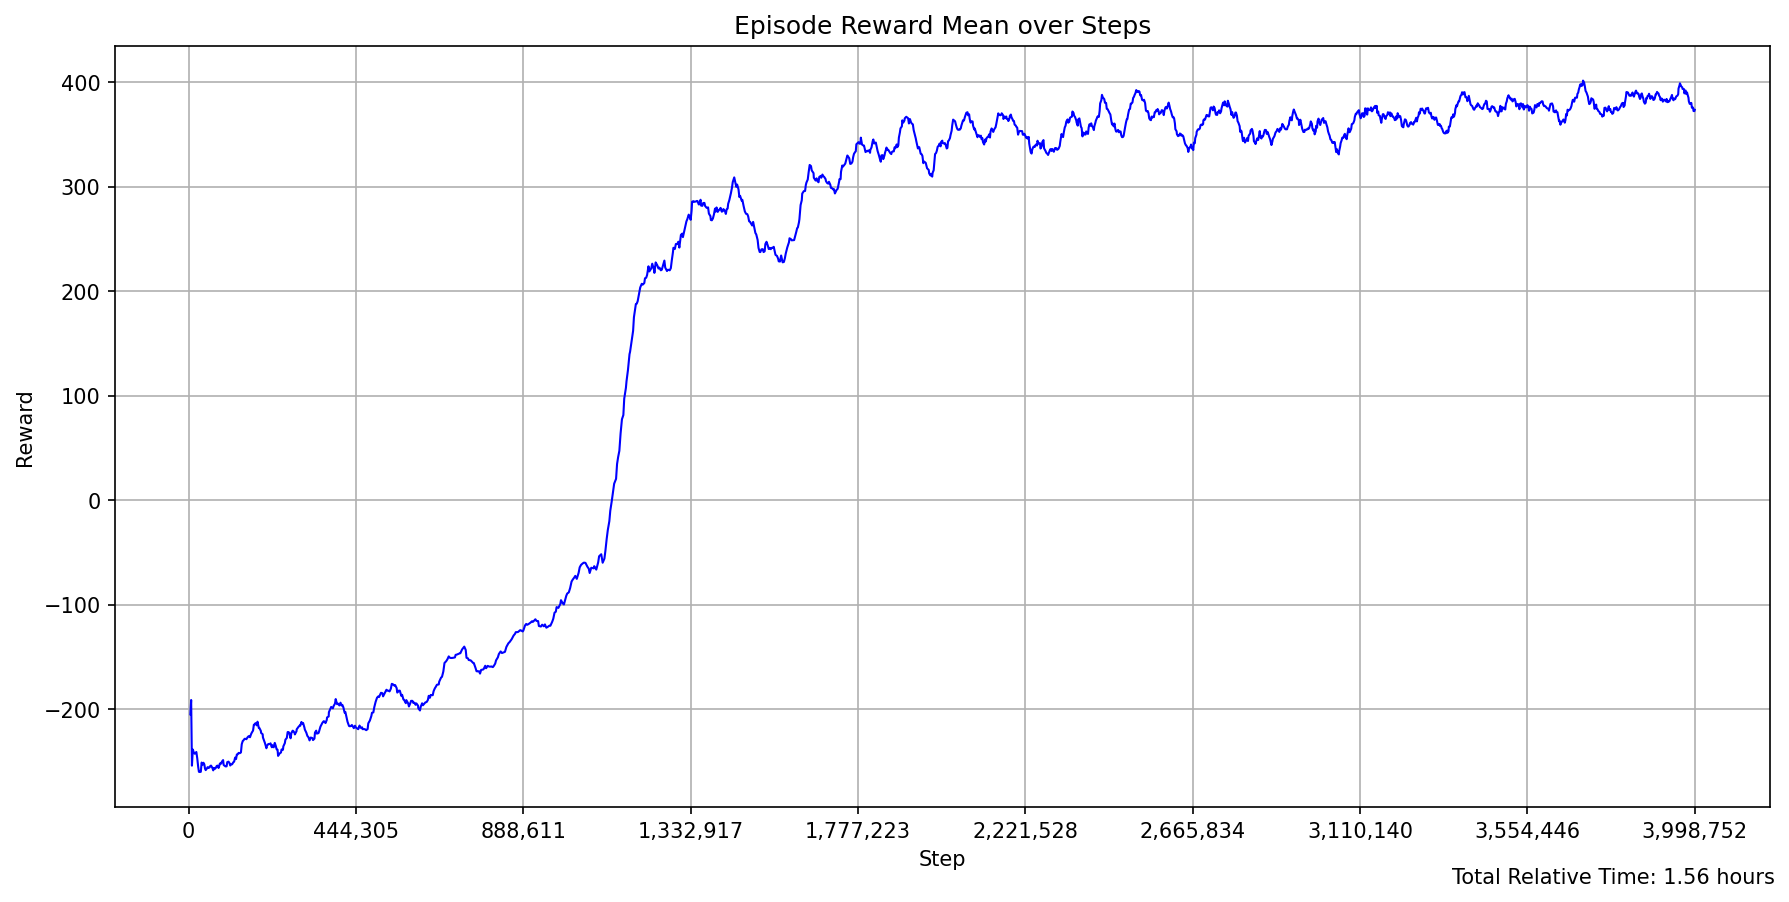

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate total wall time in seconds and then convert to hours
start_time = df['wall_time'].iloc[0]
end_time = df['wall_time'].iloc[-1]
total_seconds = end_time - start_time
total_hours = total_seconds / 3600

# Create a figure with a higher DPI for a crisp image
plt.figure(figsize=(12, 6), dpi=150)

# Define the x-ticks (optional, for better readability)
max_step = df['step'].max()
ticks = np.linspace(0, max_step, 10)

# Plot the data with a thin line and no markers
plt.plot(
    df['step'], 
    df['value'], 
    linewidth=1.0,        # Thin line
    linestyle='-', 
    color='b',
    marker=None           # No markers
)

# Set labels and title
plt.xlabel('Step')
plt.ylabel('Reward')
plt.title('Episode Reward Mean over Steps')

# Disable scientific notation for the x-axis and format tick labels with commas
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(ticks, [f'{int(tick):,}' for tick in ticks])

# Add a grid and adjust layout
plt.grid(True)
plt.tight_layout()

# Add the total relative time as text on the figure.
# plt.figtext places text relative to the figure (0 to 1 coordinates).
plt.figtext(0.99, 0.01, f"Total Relative Time: {total_hours:.2f} hours",
            horizontalalignment='right', fontsize=10, color='black')

plt.show()


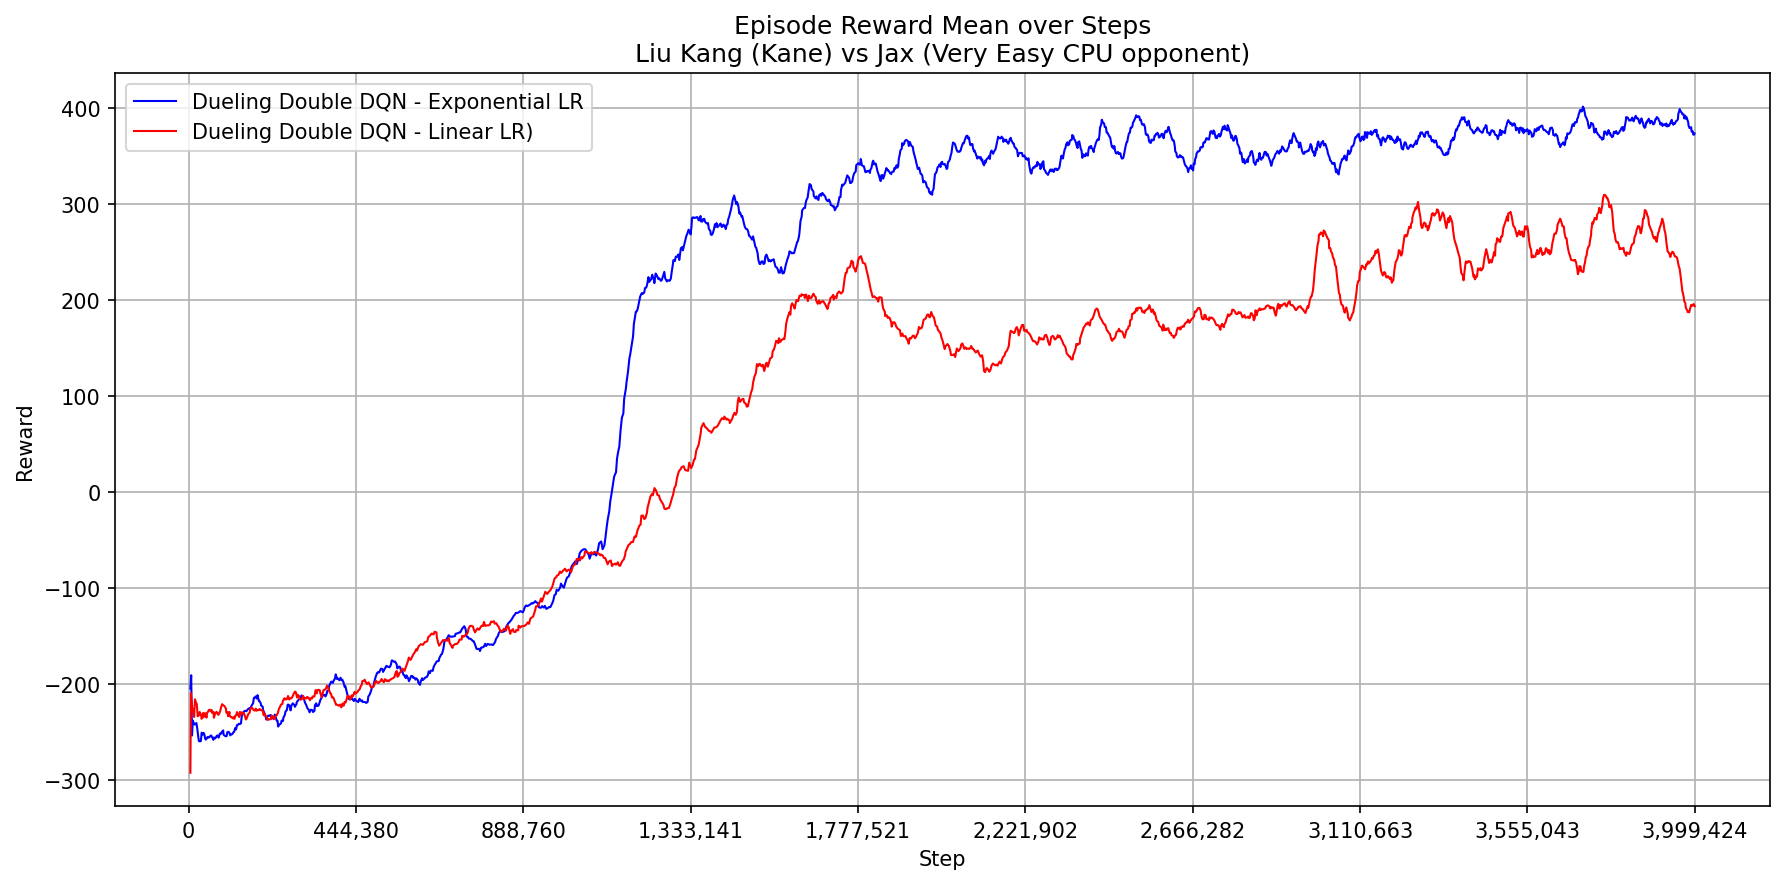

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator

def load_tensorboard_df(log_dir, tag='rollout/ep_rew_mean'):
    """
    Load TensorBoard log data from the given directory and convert it into a pandas DataFrame.
    The DataFrame will have columns: 'wall_time', 'step', and 'value'.
    """
    ea = event_accumulator.EventAccumulator(log_dir, size_guidance={'scalars': 0})
    ea.Reload()
    events = ea.Scalars(tag)
    # Create a DataFrame from the events
    df = pd.DataFrame(
        [(e.wall_time, e.step, e.value) for e in events],
        columns=['wall_time', 'step', 'value']
    )
    return df

# --- Define Base Log Directory and Experiment Subdirectories ---
base_log_dir = '/mnt/c/Users/SHiFT/OneDrive/Documents/dev/Kane vs Abel Mortal Kombat II/experiments/logs/DuelingDDQN'
exp_lr_subdir = 'DuelingDoubleDQN_4M_VeryEasyVsJax_ExpLr'  # Exponential Decay LR
ln_lr_subdir  = 'DuelingDoubleDQN_4M_VeryEasyVsJax_LnLr'    # Linear LR

# Build full paths for each experiment's log directory
exp_lr_dir = os.path.join(base_log_dir, exp_lr_subdir)
ln_lr_dir = os.path.join(base_log_dir, ln_lr_subdir)

# --- Load Data for Each Experiment ---
tag = 'rollout/ep_rew_mean'
df_exp = load_tensorboard_df(exp_lr_dir, tag=tag)
df_ln  = load_tensorboard_df(ln_lr_dir, tag=tag)

# --- Compute Total Elapsed Time (in hours) for Each Experiment ---
total_hours_exp = (df_exp['wall_time'].iloc[-1] - df_exp['wall_time'].iloc[0]) / 3600
total_hours_ln  = (df_ln['wall_time'].iloc[-1]  - df_ln['wall_time'].iloc[0]) / 3600

# --- Create the Plot ---
plt.figure(figsize=(12, 6), dpi=150)

# Determine the maximum step from both experiments for setting x-axis ticks
max_step = max(df_exp['step'].max(), df_ln['step'].max())
ticks = np.linspace(0, max_step, 10)

# Plot the Exponential LR experiment
plt.plot(
    df_exp['step'],
    df_exp['value'],
    label=f'Dueling Double DQN - Exponential LR',
    linewidth=1.0,
    linestyle='-',
    color='b'
)

# Plot the Linear LR experiment
plt.plot(
    df_ln['step'],
    df_ln['value'],
    label=f'Dueling Double DQN - Linear LR)',
    linewidth=1.0,
    linestyle='-',
    color='r'
)

# Set axis labels and plot title
plt.xlabel('Step')
plt.ylabel('Reward')
plt.title('Episode Reward Mean over Steps\nLiu Kang (Kane) vs Jax (Very Easy CPU opponent)')

# Format x-axis ticks with plain numbers and commas
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(ticks, [f'{int(tick):,}' for tick in ticks])

# Add a grid and legend
plt.grid(True)
plt.legend(loc='upper left')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


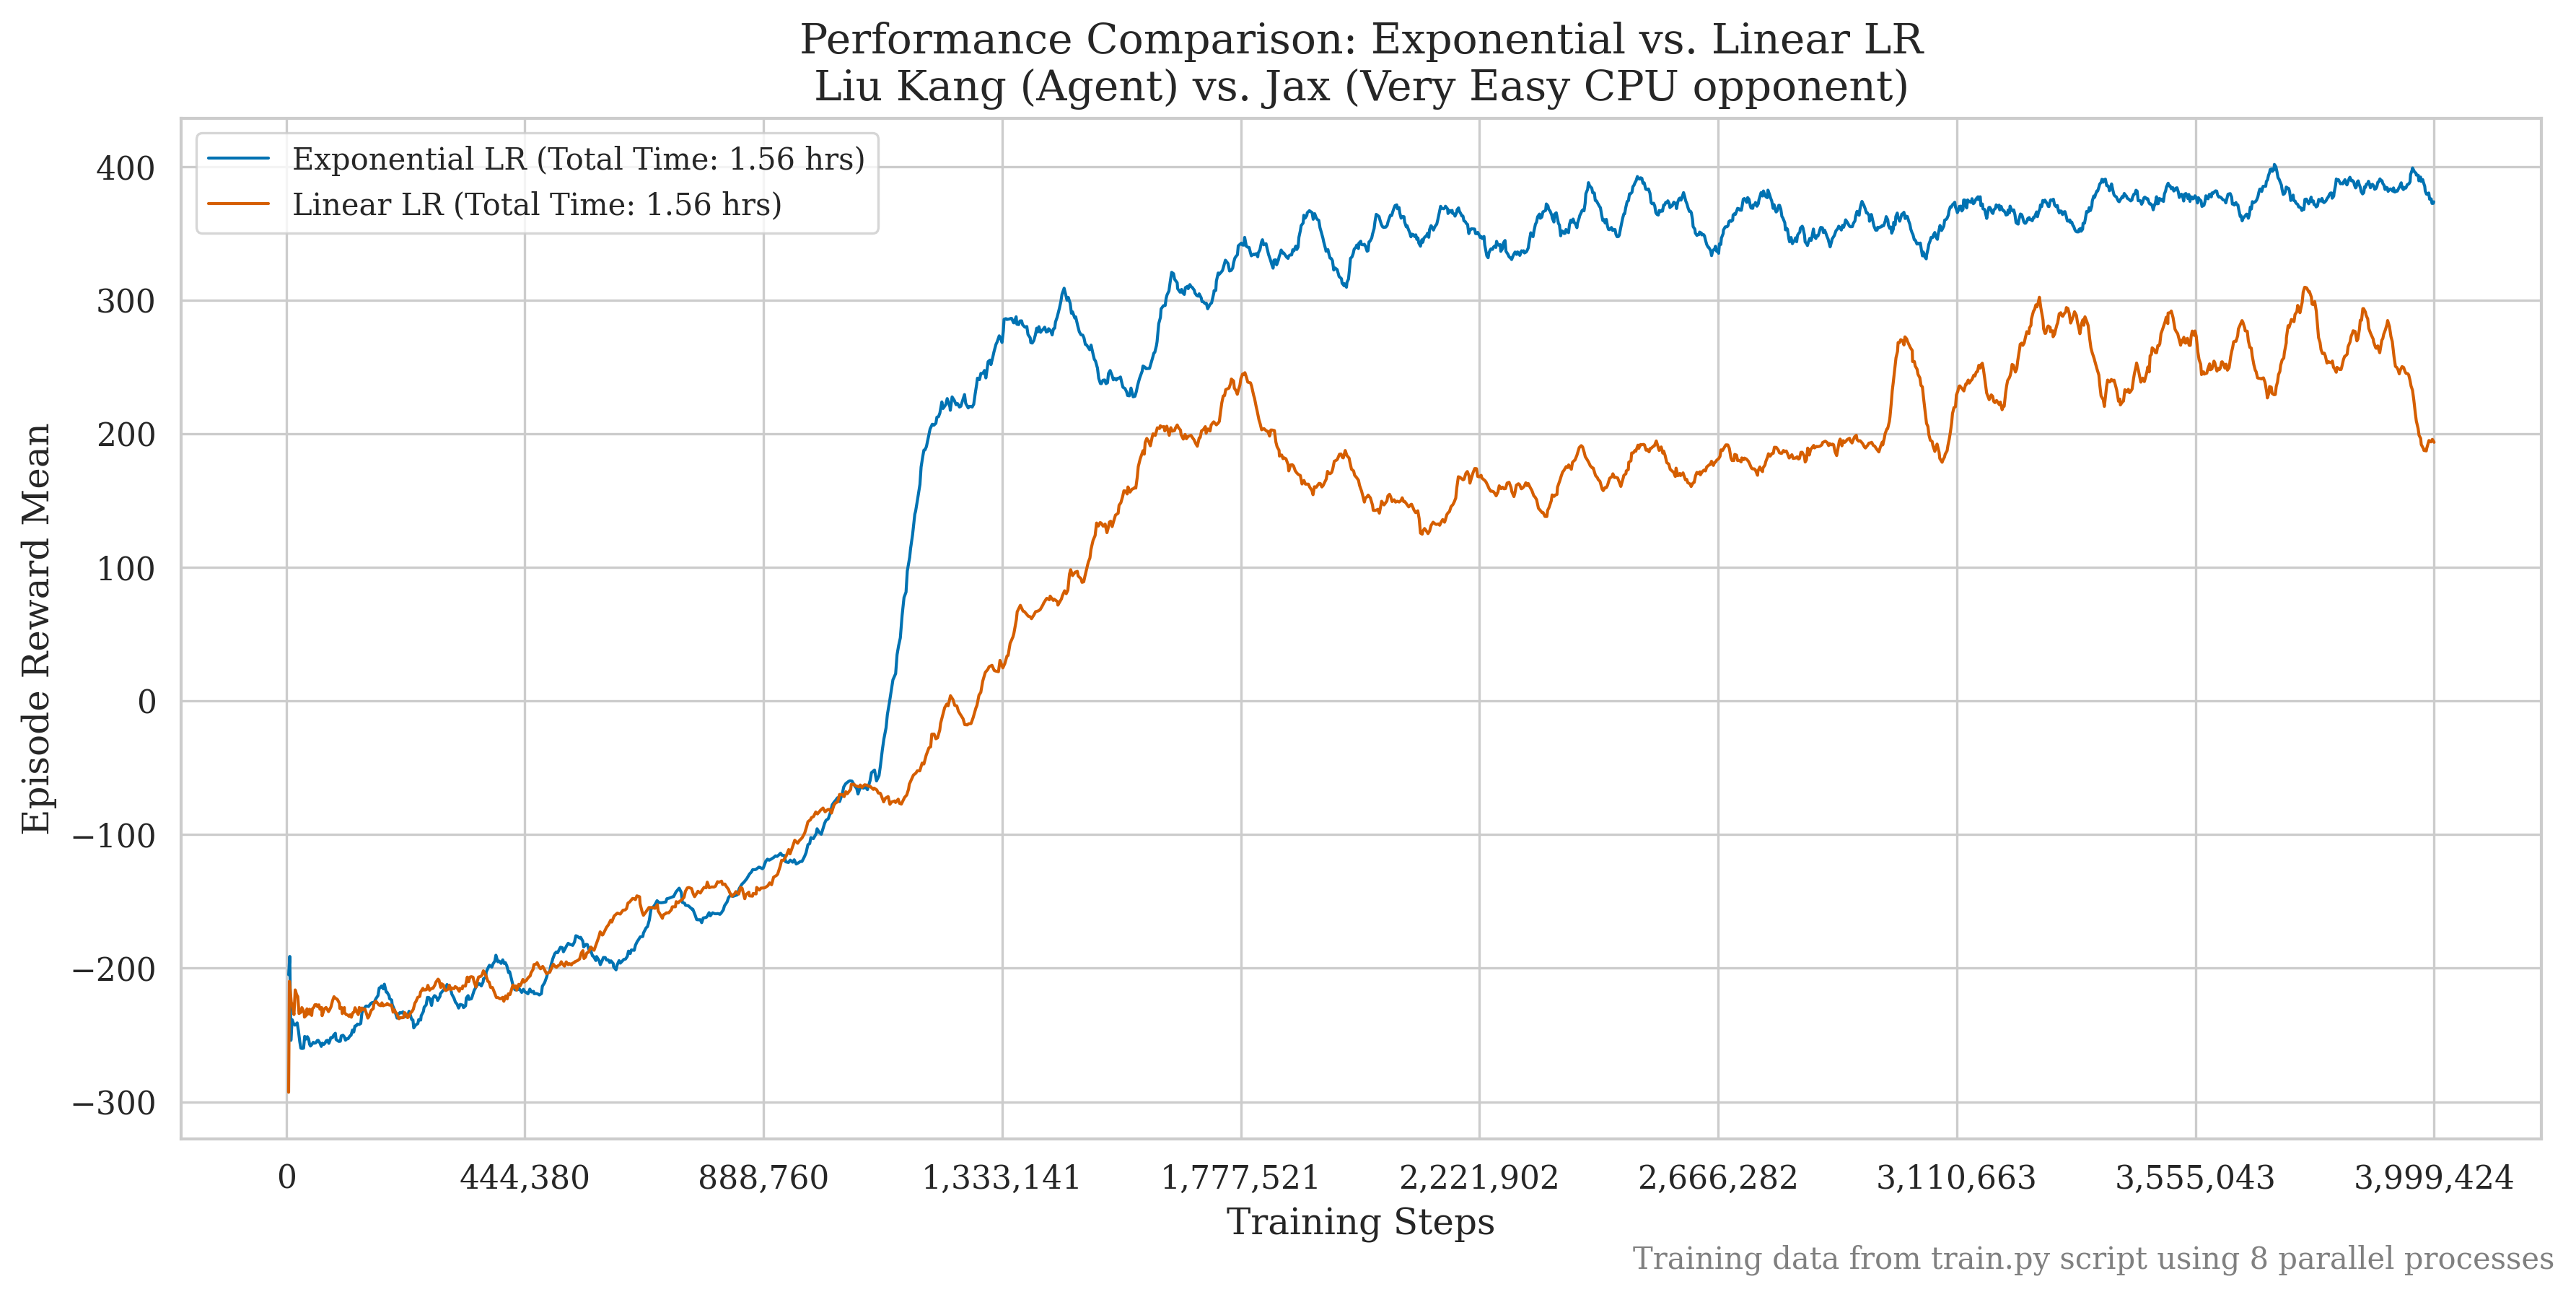

In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorboard.backend.event_processing import event_accumulator

# --- Helper Function to Load TensorBoard Data ---
def load_tensorboard_df(log_dir, tag='rollout/ep_rew_mean'):
    ea = event_accumulator.EventAccumulator(log_dir, size_guidance={'scalars': 0})
    ea.Reload()
    events = ea.Scalars(tag)
    df = pd.DataFrame(
        [(e.wall_time, e.step, e.value) for e in events],
        columns=['wall_time', 'step', 'value']
    )
    return df

# --- Define Log Directories ---
base_log_dir = '/mnt/c/Users/SHiFT/OneDrive/Documents/dev/Kane vs Abel Mortal Kombat II/experiments/logs/DuelingDDQN'
exp_lr_dir = os.path.join(base_log_dir, 'DuelingDoubleDQN_4M_VeryEasyVsJax_ExpLr')
ln_lr_dir  = os.path.join(base_log_dir, 'DuelingDoubleDQN_4M_VeryEasyVsJax_LnLr')

# --- Load Data ---
tag = 'rollout/ep_rew_mean'
df_exp = load_tensorboard_df(exp_lr_dir, tag=tag)
df_ln  = load_tensorboard_df(ln_lr_dir, tag=tag)

# --- Compute Total Wall Time in Hours ---
total_hours_exp = (df_exp['wall_time'].iloc[-1] - df_exp['wall_time'].iloc[0]) / 3600
total_hours_ln  = (df_ln['wall_time'].iloc[-1]  - df_ln['wall_time'].iloc[0]) / 3600

# --- Set Professional Plot Style ---
sns.set_context("paper", font_scale=1.2)
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'lines.linewidth': 1.0,
    'lines.markersize': 4,
    'legend.fontsize': 10,
    'figure.dpi': 300,
})

# --- Create the Plot ---
plt.figure(figsize=(12, 6), dpi=300)

# Define tick positions for x-axis
max_step = max(df_exp['step'].max(), df_ln['step'].max())
ticks = np.linspace(0, max_step, 10)

# Color choices (colorblind-friendly)
exp_color = '#0072B2'
ln_color  = '#D55E00'

# Plot each experiment
plt.plot(
    df_exp['step'], df_exp['value'],
    label=f'Exponential LR (Total Time: {total_hours_exp:.2f} hrs)',
    color=exp_color
)
plt.plot(
    df_ln['step'], df_ln['value'],
    label=f'Linear LR (Total Time: {total_hours_ln:.2f} hrs)',
    color=ln_color
)

# Axis Labels and Title
plt.xlabel('Training Steps')
plt.ylabel('Episode Reward Mean')
plt.title('Performance Comparison: Exponential vs. Linear LR\nLiu Kang (Agent) vs. Jax (Very Easy CPU opponent)')

# Tick Formatting
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(ticks, [f'{int(tick):,}' for tick in ticks])

# Legend and Grid
plt.legend(loc='upper left', frameon=True)
plt.grid(True)

# Add additional annotation if desired
plt.figtext(0.99, 0.01, "Training data from train.py script using 8 parallel processes", 
            horizontalalignment='right', fontsize=10, color='gray')

plt.tight_layout()

# Save the figure as a PDF for vector quality
plt.savefig('adversarial_rl_comparison.pdf', format='pdf', bbox_inches='tight')
plt.show()


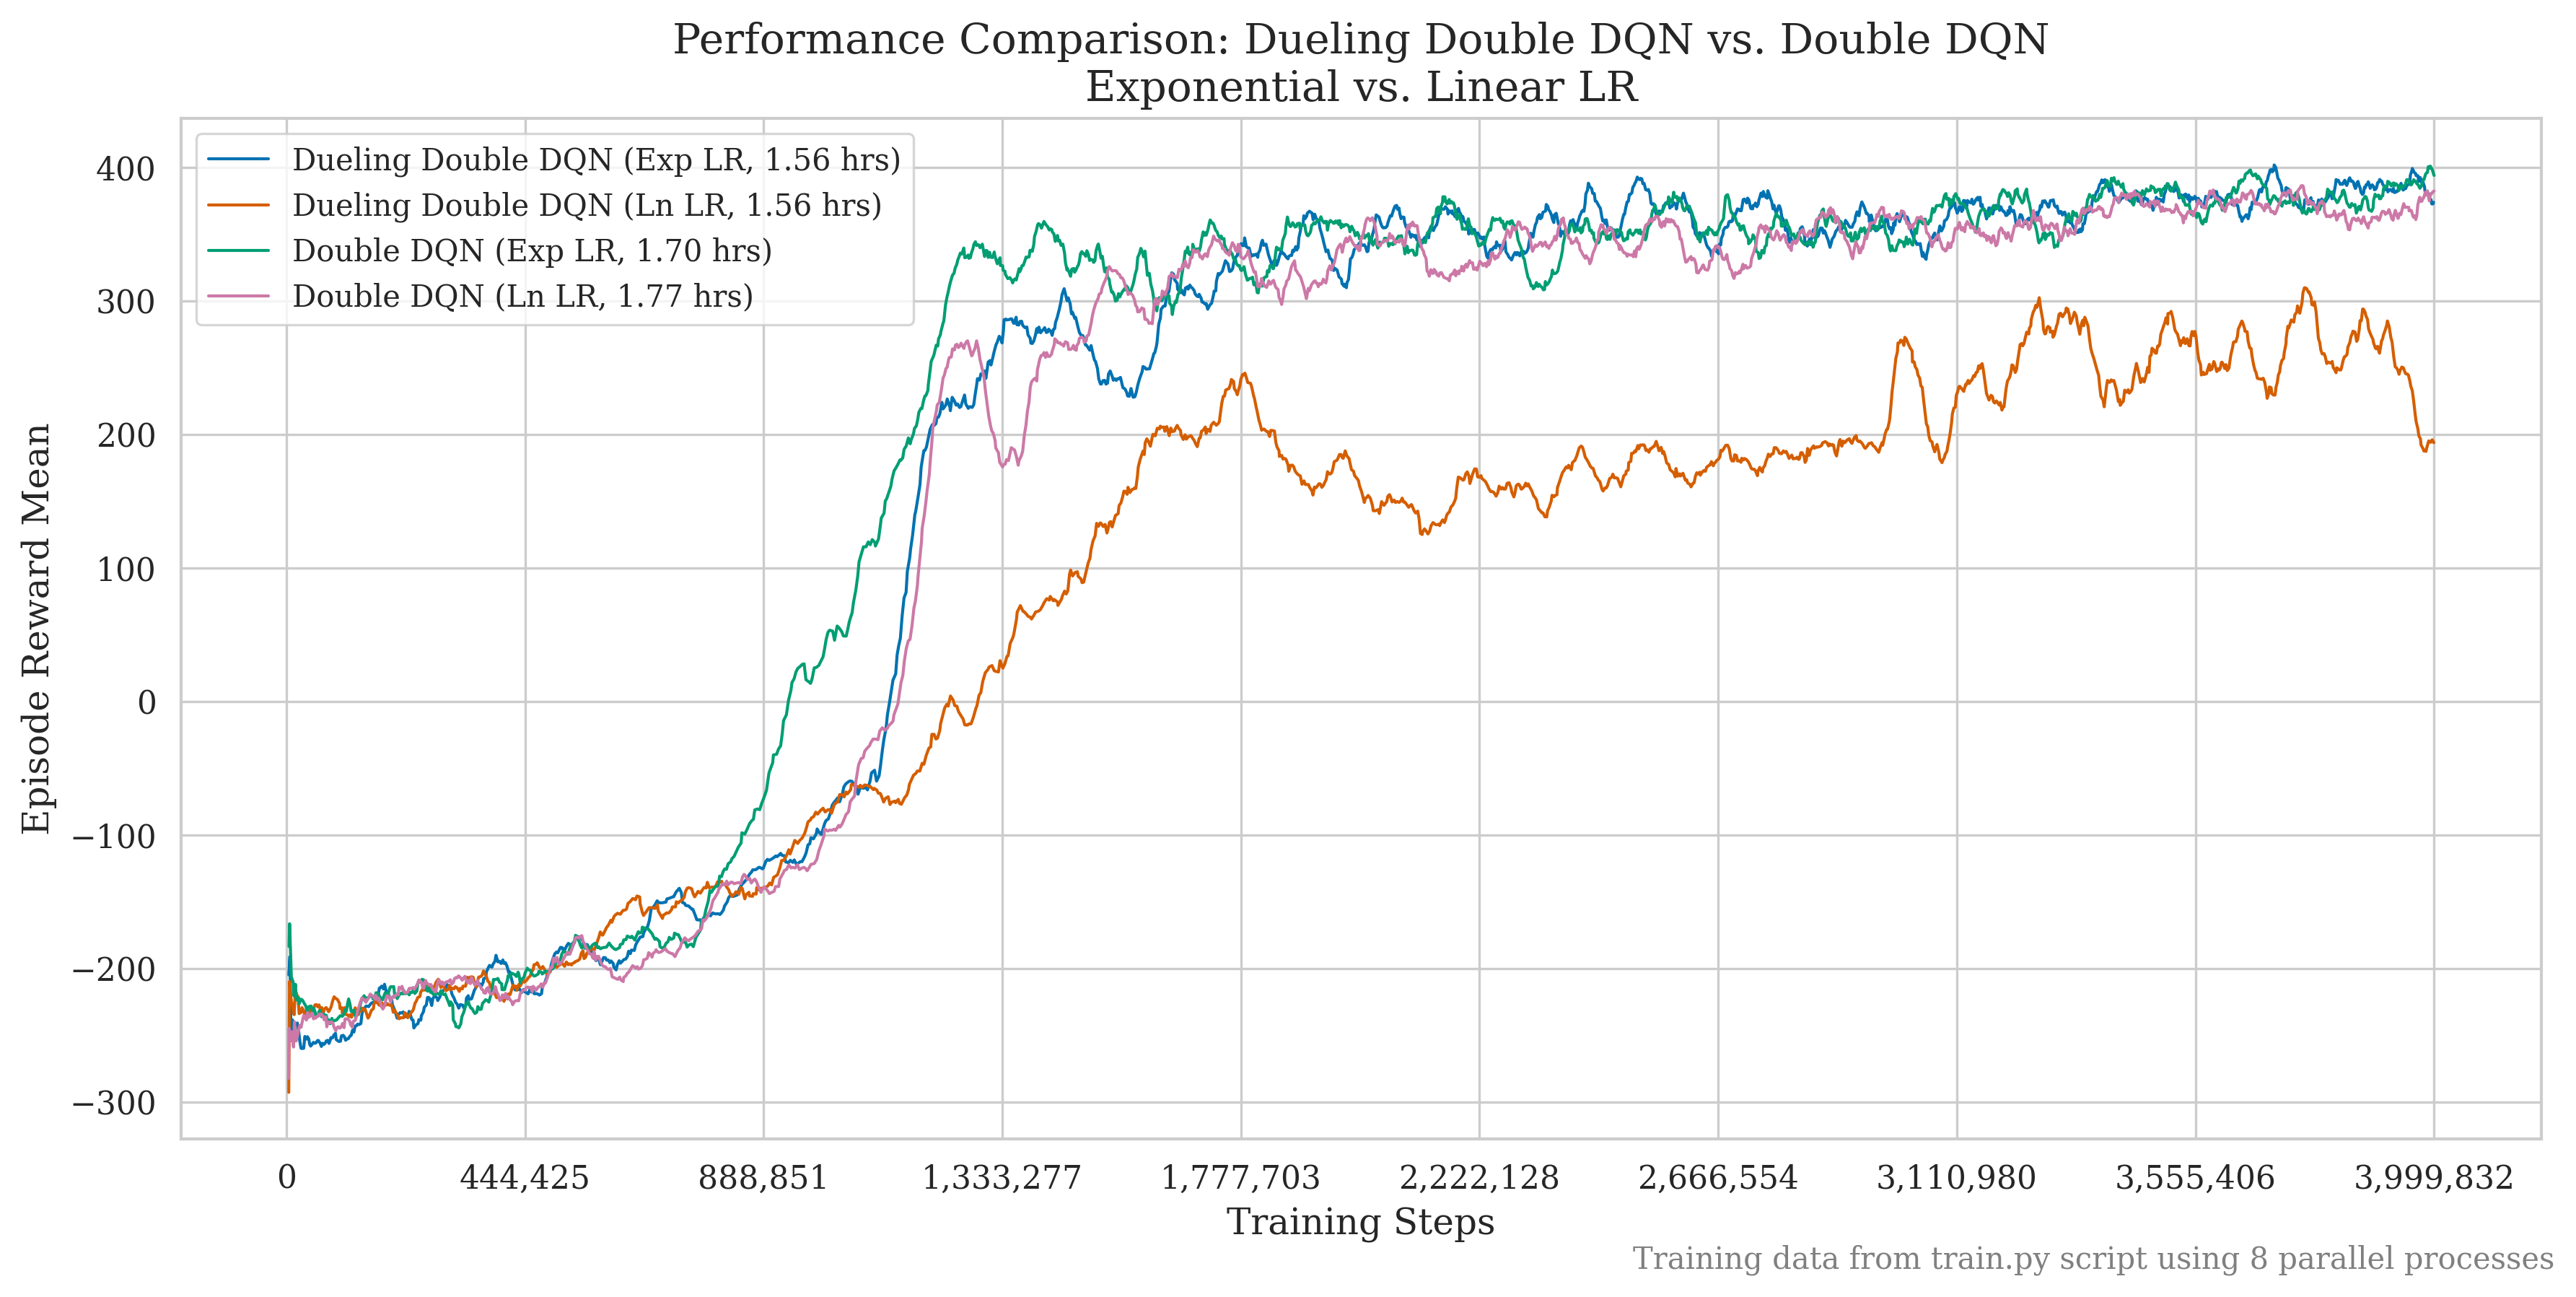

In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorboard.backend.event_processing import event_accumulator

# --- Helper Function to Load TensorBoard Data ---
def load_tensorboard_df(log_dir, tag='rollout/ep_rew_mean'):
    ea = event_accumulator.EventAccumulator(log_dir, size_guidance={'scalars': 0})
    ea.Reload()
    events = ea.Scalars(tag)
    df = pd.DataFrame(
        [(e.wall_time, e.step, e.value) for e in events],
        columns=['wall_time', 'step', 'value']
    )
    return df

# === Define Log Directories ===

# For Dueling Double DQN experiments
base_log_dir_dueling = '/mnt/c/Users/SHiFT/OneDrive/Documents/dev/Kane vs Abel Mortal Kombat II/experiments/logs/DuelingDDQN'
dueling_exp_lr_dir = os.path.join(base_log_dir_dueling, 'DuelingDoubleDQN_4M_VeryEasyVsJax_ExpLr')
dueling_ln_lr_dir  = os.path.join(base_log_dir_dueling, 'DuelingDoubleDQN_4M_VeryEasyVsJax_LnLr')

# For Double DQN experiments
base_log_dir_ddqn = '/mnt/c/Users/SHiFT/OneDrive/Documents/dev/Kane vs Abel Mortal Kombat II/experiments/logs/DoubleDQN'
ddqn_exp_lr_dir = os.path.join(base_log_dir_ddqn, 'DQN_1')  # assumed to be Exponential LR
ddqn_ln_lr_dir  = os.path.join(base_log_dir_ddqn, 'DQN_3')  # assumed to be Linear LR

# === Load Data ===
tag = 'rollout/ep_rew_mean'

# Dueling Double DQN data
df_dueling_exp = load_tensorboard_df(dueling_exp_lr_dir, tag=tag)
df_dueling_ln  = load_tensorboard_df(dueling_ln_lr_dir, tag=tag)

# Double DQN data
df_ddqn_exp = load_tensorboard_df(ddqn_exp_lr_dir, tag=tag)
df_ddqn_ln  = load_tensorboard_df(ddqn_ln_lr_dir, tag=tag)

# === Compute Total Wall Time in Hours ===
total_hours_dueling_exp = (df_dueling_exp['wall_time'].iloc[-1] - df_dueling_exp['wall_time'].iloc[0]) / 3600
total_hours_dueling_ln  = (df_dueling_ln['wall_time'].iloc[-1]  - df_dueling_ln['wall_time'].iloc[0]) / 3600
total_hours_ddqn_exp = (df_ddqn_exp['wall_time'].iloc[-1] - df_ddqn_exp['wall_time'].iloc[0]) / 3600
total_hours_ddqn_ln  = (df_ddqn_ln['wall_time'].iloc[-1]  - df_ddqn_ln['wall_time'].iloc[0]) / 3600

# === Set Professional Plot Style ===
sns.set_context("paper", font_scale=1.2)
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'lines.linewidth': 1.0,
    'lines.markersize': 4,
    'legend.fontsize': 10,
    'figure.dpi': 300,
})

# === Create the Plot ===
plt.figure(figsize=(12, 6), dpi=300)

# Determine the maximum step among all experiments for consistent x-axis ticks
max_step = max(
    df_dueling_exp['step'].max(),
    df_dueling_ln['step'].max(),
    df_ddqn_exp['step'].max(),
    df_ddqn_ln['step'].max()
)
ticks = np.linspace(0, max_step, 10)

# Define color choices (colorblind-friendly)
# Dueling Double DQN colors
dueling_exp_color = '#0072B2'  # Blue
dueling_ln_color  = '#D55E00'  # Red
# Double DQN colors
ddqn_exp_color    = '#009E73'  # Green
ddqn_ln_color     = '#CC79A7'  # Purple

# Plot Dueling Double DQN curves
plt.plot(
    df_dueling_exp['step'], df_dueling_exp['value'],
    label=f'Dueling Double DQN (Exp LR, {total_hours_dueling_exp:.2f} hrs)',
    color=dueling_exp_color
)
plt.plot(
    df_dueling_ln['step'], df_dueling_ln['value'],
    label=f'Dueling Double DQN (Ln LR, {total_hours_dueling_ln:.2f} hrs)',
    color=dueling_ln_color
)

# Plot Double DQN curves
plt.plot(
    df_ddqn_exp['step'], df_ddqn_exp['value'],
    label=f'Double DQN (Exp LR, {total_hours_ddqn_exp:.2f} hrs)',
    color=ddqn_exp_color
)
plt.plot(
    df_ddqn_ln['step'], df_ddqn_ln['value'],
    label=f'Double DQN (Ln LR, {total_hours_ddqn_ln:.2f} hrs)',
    color=ddqn_ln_color
)

# Axis Labels and Title
plt.xlabel('Training Steps')
plt.ylabel('Episode Reward Mean')
plt.title('Performance Comparison: Dueling Double DQN vs. Double DQN\nExponential vs. Linear LR')

# Tick Formatting
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(ticks, [f'{int(tick):,}' for tick in ticks])

# Legend and Grid
plt.legend(loc='upper left', frameon=True)
plt.grid(True)

# Additional annotation (optional)
plt.figtext(0.99, 0.01, "Training data from train.py script using 8 parallel processes", 
            horizontalalignment='right', fontsize=10, color='gray')

plt.tight_layout()

# Save the figure as a PDF for vector quality
plt.savefig('adversarial_rl_comparison.pdf', format='pdf', bbox_inches='tight')
plt.show()


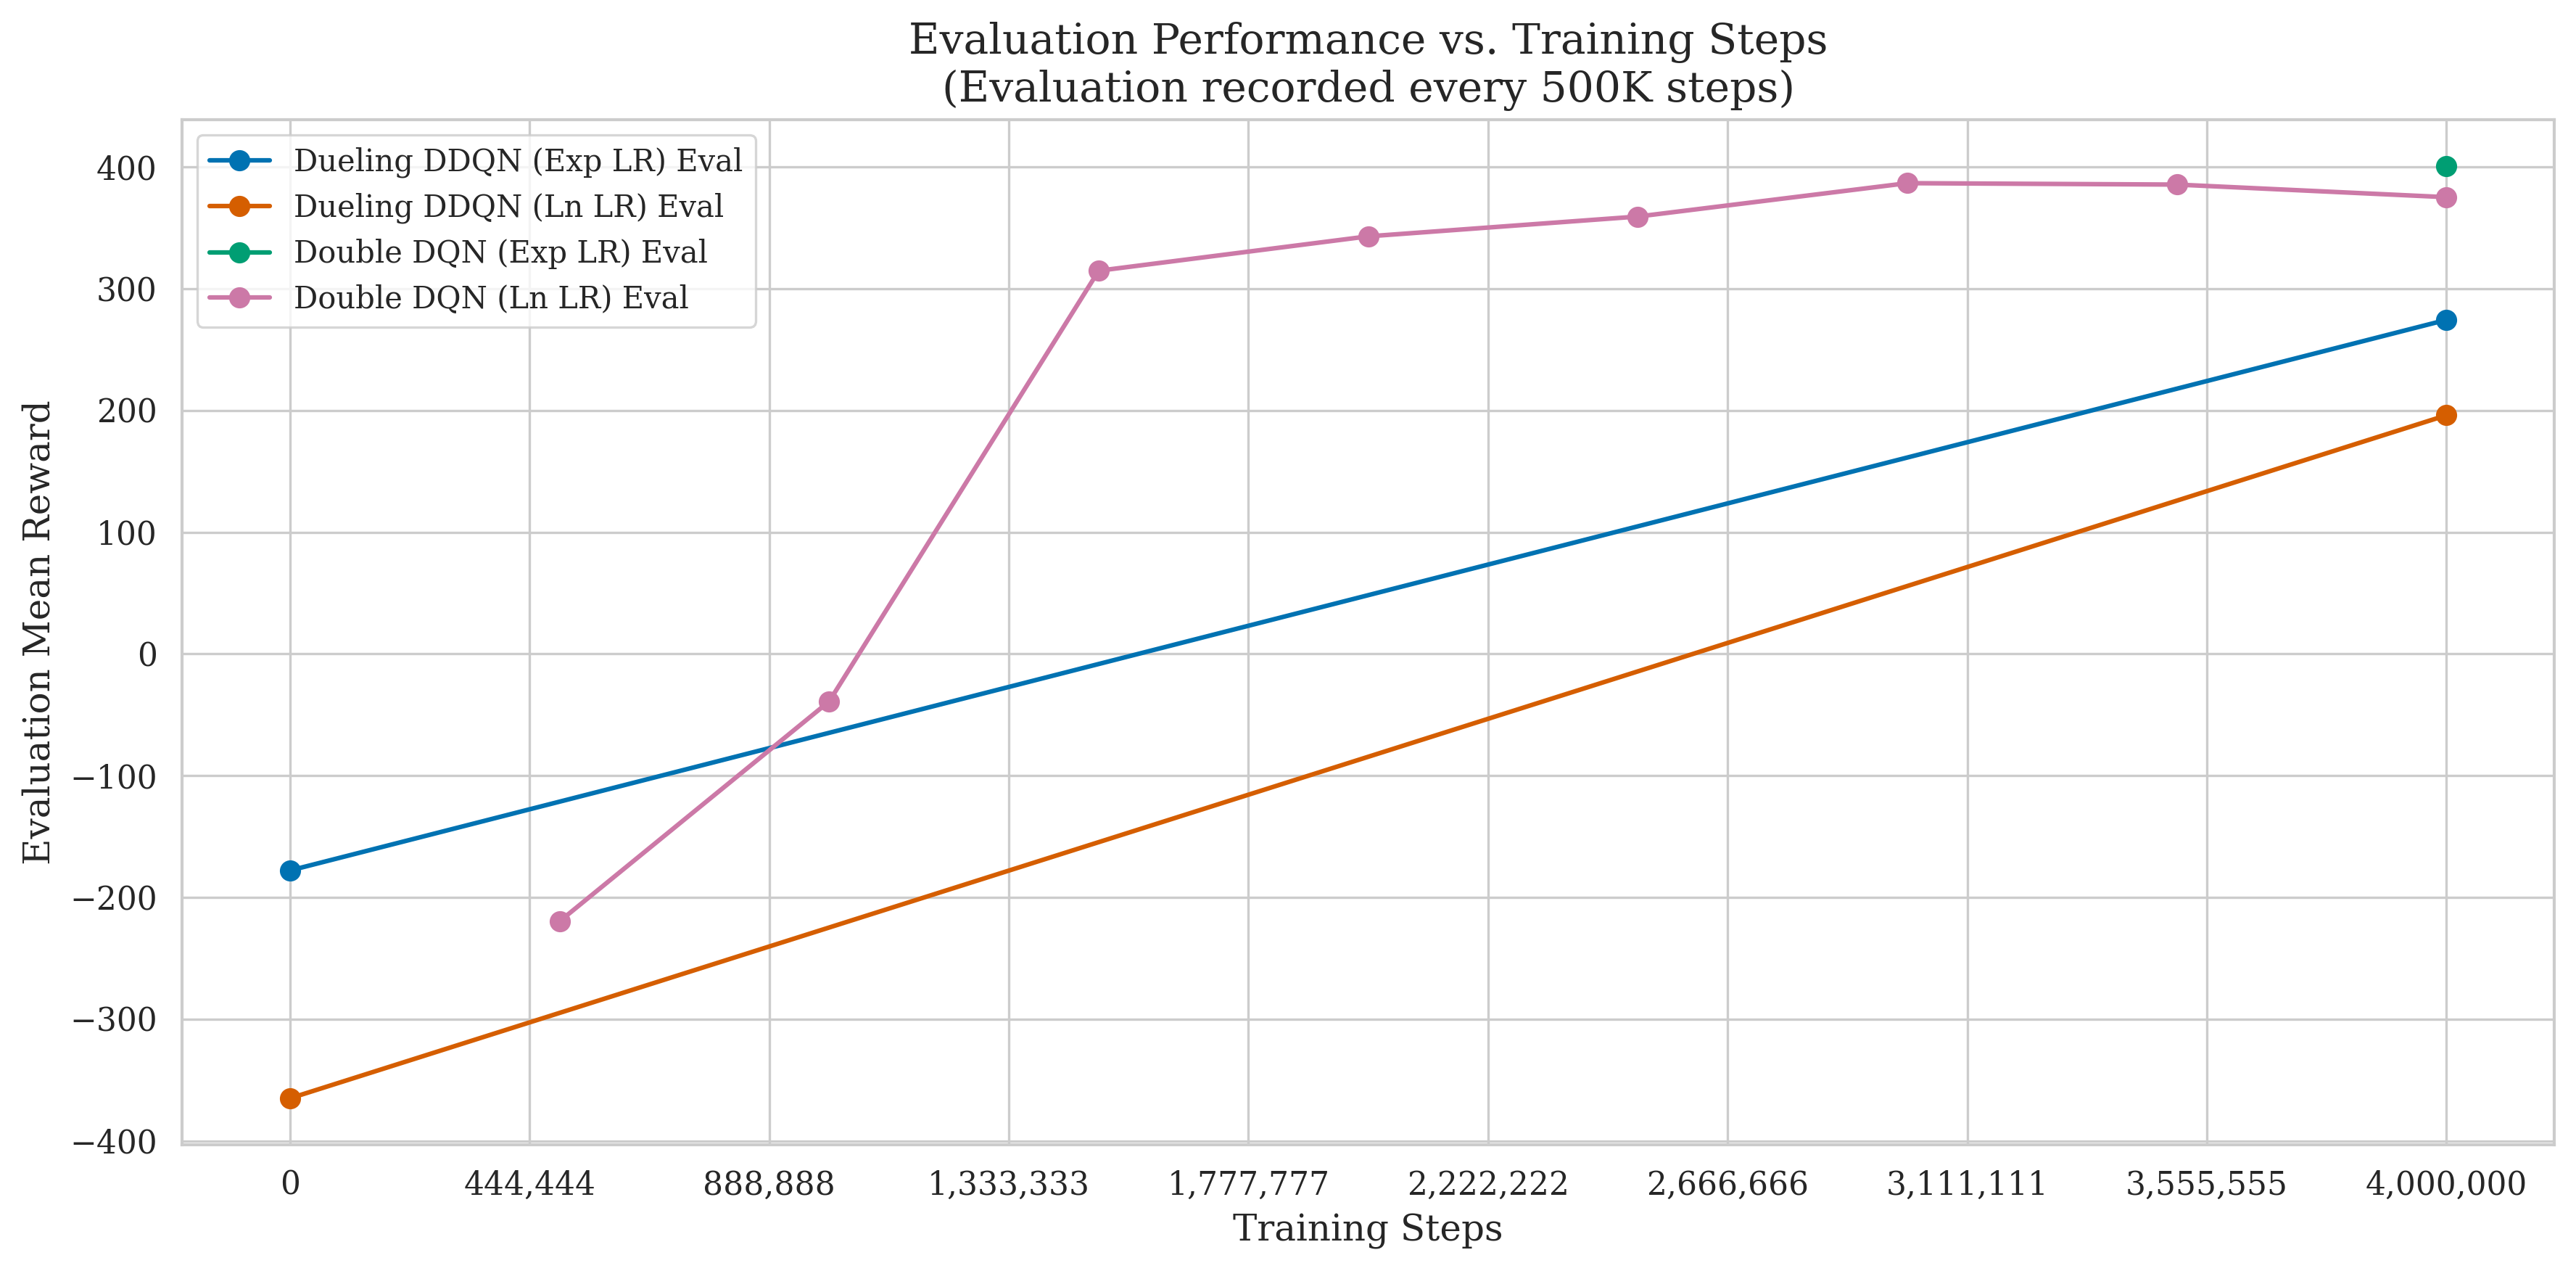

In [23]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorboard.backend.event_processing import event_accumulator

# --- Helper Function to Load TensorBoard Data ---
def load_tensorboard_df(log_dir, tag):
    ea = event_accumulator.EventAccumulator(log_dir, size_guidance={'scalars': 0})
    ea.Reload()
    events = ea.Scalars(tag)
    df = pd.DataFrame(
        [(e.wall_time, e.step, e.value) for e in events],
        columns=['wall_time', 'step', 'value']
    )
    return df

# ======================================================
# Model Directories (as provided)
# ======================================================

# For Dueling Double DQN experiments
base_log_dir_dueling = '/mnt/c/Users/SHiFT/OneDrive/Documents/dev/Kane vs Abel Mortal Kombat II/experiments/logs/DuelingDDQN'
dueling_exp_lr_dir = os.path.join(base_log_dir_dueling, 'DuelingDoubleDQN_4M_VeryEasyVsJax_ExpLr')
dueling_ln_lr_dir  = os.path.join(base_log_dir_dueling, 'DuelingDoubleDQN_4M_VeryEasyVsJax_LnLr')

# For Double DQN experiments
base_log_dir_ddqn = '/mnt/c/Users/SHiFT/OneDrive/Documents/dev/Kane vs Abel Mortal Kombat II/experiments/logs/DoubleDQN'
ddqn_exp_lr_dir = os.path.join(base_log_dir_ddqn, 'DQN_1')  # assumed to be Exponential LR
ddqn_ln_lr_dir  = os.path.join(base_log_dir_ddqn, 'DQN_3')  # assumed to be Linear LR

# ======================================================
# Load Evaluation Data (tag: 'eval/mean_reward')
# ======================================================
eval_tag = 'eval/mean_reward'

df_dueling_exp_eval = load_tensorboard_df(dueling_exp_lr_dir, tag=eval_tag)
df_dueling_ln_eval  = load_tensorboard_df(dueling_ln_lr_dir, tag=eval_tag)
df_ddqn_exp_eval    = load_tensorboard_df(ddqn_exp_lr_dir, tag=eval_tag)
df_ddqn_ln_eval     = load_tensorboard_df(ddqn_ln_lr_dir, tag=eval_tag)

# ======================================================
# Plotting Evaluation Data
# ======================================================
# Set the plotting style
sns.set_context("paper", font_scale=1.2)
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'lines.linewidth': 1.5,
    'lines.markersize': 6,  # use larger markers for sparse eval points
    'legend.fontsize': 10,
    'figure.dpi': 300,
})

plt.figure(figsize=(12, 6), dpi=300)

# Determine the maximum training step (from eval data) for the x-axis ticks
max_step_eval = max(
    df_dueling_exp_eval['step'].max(),
    df_dueling_ln_eval['step'].max(),
    df_ddqn_exp_eval['step'].max(),
    df_ddqn_ln_eval['step'].max()
)
ticks = np.linspace(0, max_step_eval, 10)

# Define color choices (colorblind-friendly)
dueling_exp_color = '#0072B2'  # Blue: Dueling DDQN (Exp LR)
dueling_ln_color  = '#D55E00'  # Red:   Dueling DDQN (Ln LR)
ddqn_exp_color    = '#009E73'  # Green: Double DQN (Exp LR)
ddqn_ln_color     = '#CC79A7'  # Purple: Double DQN (Ln LR)

# Plot each evaluation curve with both line and markers
plt.plot(
    df_dueling_exp_eval['step'], df_dueling_exp_eval['value'],
    marker='o', linestyle='-', label='Dueling DDQN (Exp LR) Eval',
    color=dueling_exp_color
)
plt.plot(
    df_dueling_ln_eval['step'], df_dueling_ln_eval['value'],
    marker='o', linestyle='-', label='Dueling DDQN (Ln LR) Eval',
    color=dueling_ln_color
)
plt.plot(
    df_ddqn_exp_eval['step'], df_ddqn_exp_eval['value'],
    marker='o', linestyle='-', label='Double DQN (Exp LR) Eval',
    color=ddqn_exp_color
)
plt.plot(
    df_ddqn_ln_eval['step'], df_ddqn_ln_eval['value'],
    marker='o', linestyle='-', label='Double DQN (Ln LR) Eval',
    color=ddqn_ln_color
)

# Set axis labels and title
plt.xlabel('Training Steps')
plt.ylabel('Evaluation Mean Reward')
plt.title('Evaluation Performance vs. Training Steps\n(Evaluation recorded every 500K steps)')

# Format the x-axis ticks with commas
plt.xticks(ticks, [f'{int(tick):,}' for tick in ticks])

# Add legend and grid
plt.legend(loc='upper left', frameon=True)
plt.grid(True)

plt.tight_layout()
plt.savefig('evaluation_performance.pdf', format='pdf', bbox_inches='tight')
plt.show()


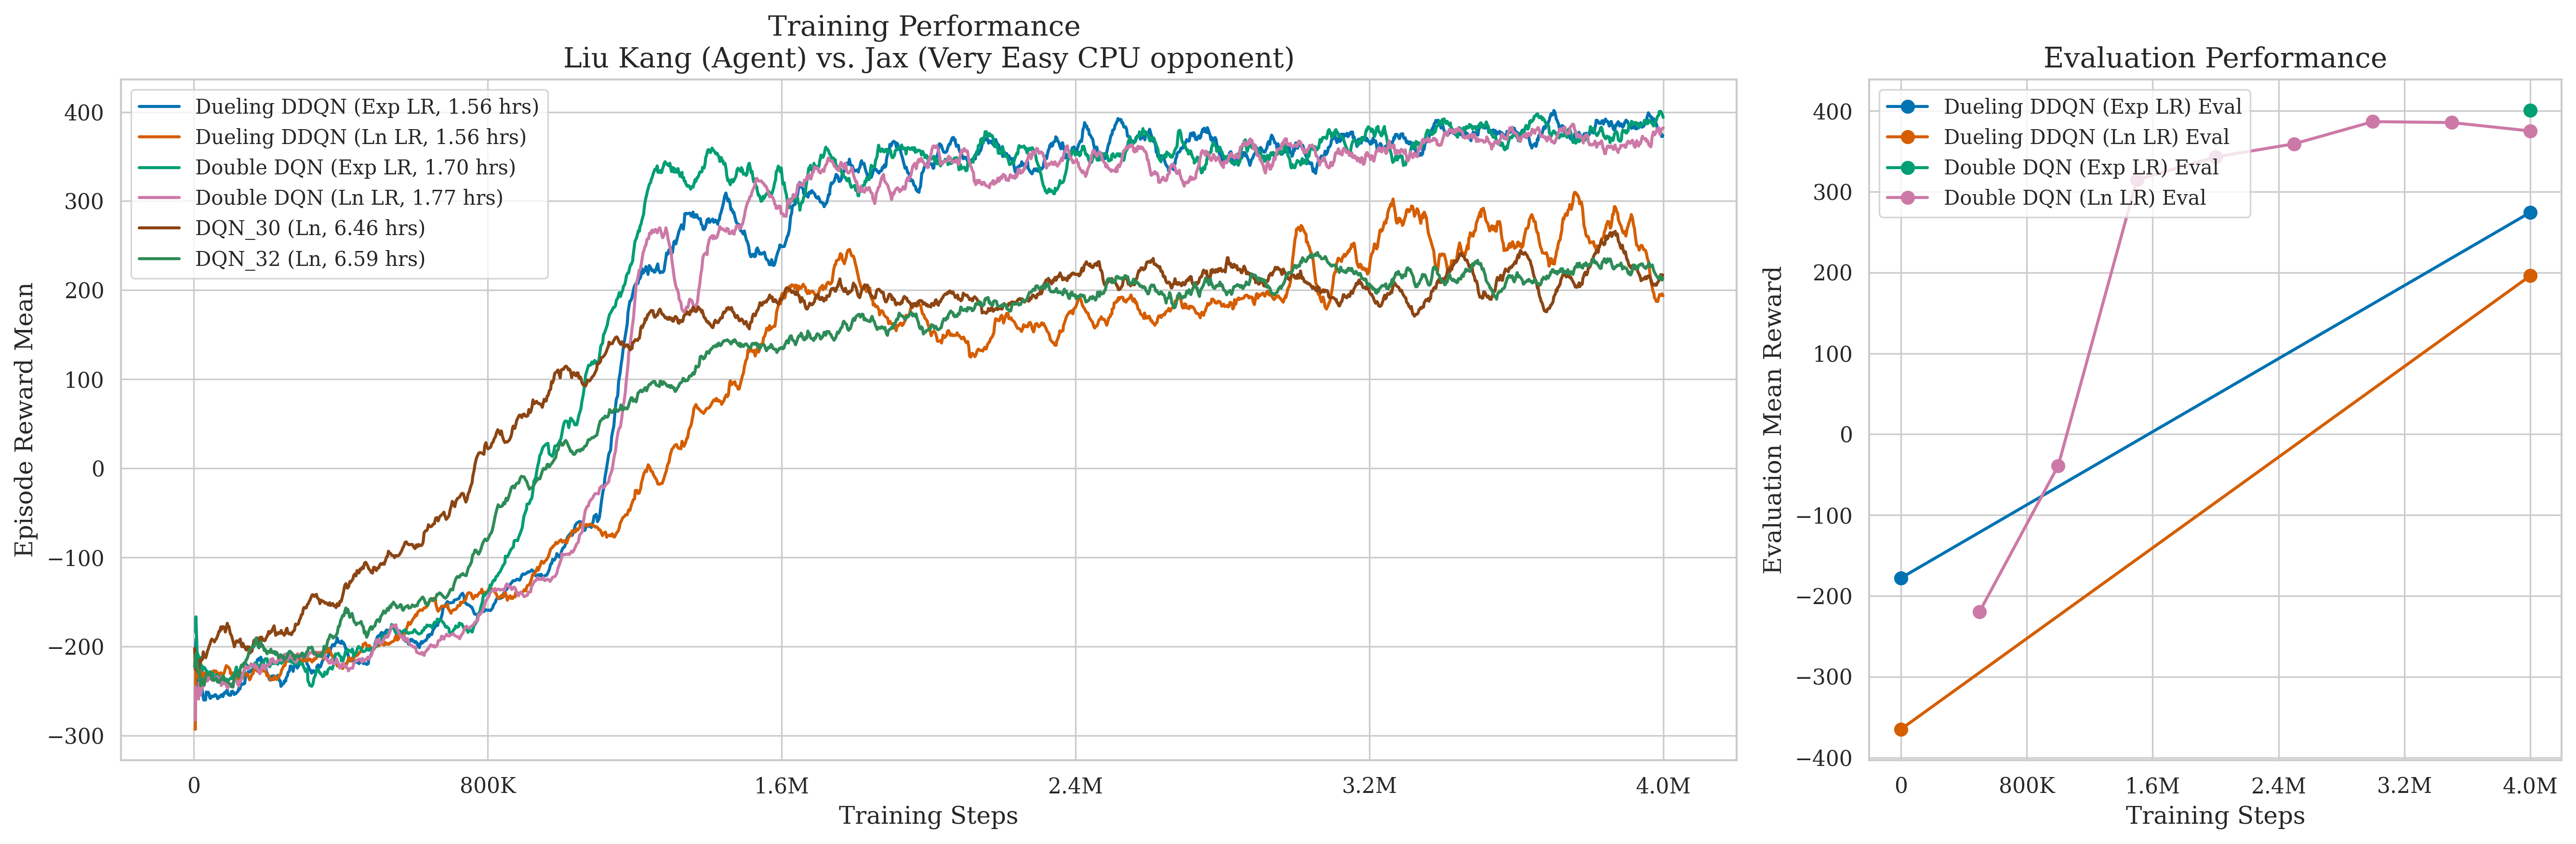

In [46]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorboard.backend.event_processing import event_accumulator
from matplotlib.ticker import FuncFormatter

# --- Helper Function to Load TensorBoard Data ---
def load_tensorboard_df(log_dir, tag):
    ea = event_accumulator.EventAccumulator(log_dir, size_guidance={'scalars': 0})
    ea.Reload()
    events = ea.Scalars(tag)
    df = pd.DataFrame(
        [(e.wall_time, e.step, e.value) for e in events],
        columns=['wall_time', 'step', 'value']
    )
    return df

# --- Custom Tick Formatter ---
def format_steps(x, pos):
    """
    Format a number x into a string:
      - If x >= 1e6, show as M (e.g. 1.0M)
      - Else if x >= 1e3, show as K (e.g. 500K)
      - Else, show as is.
    """
    if x >= 1e6:
        return f'{x/1e6:.1f}M'
    elif x >= 1e3:
        return f'{x/1e3:.0f}K'
    else:
        return f'{x:g}'

# ======================================================
# Define Directories (as provided)
# ======================================================
# For Dueling Double DQN experiments
base_log_dir_dueling = '/mnt/c/Users/SHiFT/OneDrive/Documents/dev/Kane vs Abel Mortal Kombat II/experiments/logs/DuelingDDQN'
dueling_exp_lr_dir = os.path.join(base_log_dir_dueling, 'DuelingDoubleDQN_4M_VeryEasyVsJax_ExpLr')
dueling_ln_lr_dir  = os.path.join(base_log_dir_dueling, 'DuelingDoubleDQN_4M_VeryEasyVsJax_LnLr')

# For Double DQN experiments
base_log_dir_ddqn = '/mnt/c/Users/SHiFT/OneDrive/Documents/dev/Kane vs Abel Mortal Kombat II/experiments/logs/DoubleDQN'
ddqn_exp_lr_dir = os.path.join(base_log_dir_ddqn, 'DQN_1')  # assumed to be Exponential LR
ddqn_ln_lr_dir  = os.path.join(base_log_dir_ddqn, 'DQN_3')  # assumed to be Linear LR

# New DQN experiments (training only; they don't have eval)
dqn30_dir = '/mnt/c/Users/SHiFT/OneDrive/Documents/dev/Kane vs Abel Mortal Kombat II/experiments/expirements/logs/DQN_30'
dqn32_dir = '/mnt/c/Users/SHiFT/OneDrive/Documents/dev/Kane vs Abel Mortal Kombat II/experiments/expirements/logs/DQN_32'

# ======================================================
# Load Training Data (tag: 'rollout/ep_rew_mean')
# ======================================================
training_tag = 'rollout/ep_rew_mean'
df_dueling_exp_train = load_tensorboard_df(dueling_exp_lr_dir, tag=training_tag)
df_dueling_ln_train  = load_tensorboard_df(dueling_ln_lr_dir, tag=training_tag)
df_ddqn_exp_train    = load_tensorboard_df(ddqn_exp_lr_dir, tag=training_tag)
df_ddqn_ln_train     = load_tensorboard_df(ddqn_ln_lr_dir, tag=training_tag)
df_dqn30_train       = load_tensorboard_df(dqn30_dir, tag=training_tag)
df_dqn32_train       = load_tensorboard_df(dqn32_dir, tag=training_tag)

# Compute Total Wall Time in Hours (for legend annotation)
total_hours_dueling_exp = (df_dueling_exp_train['wall_time'].iloc[-1] - df_dueling_exp_train['wall_time'].iloc[0]) / 3600
total_hours_dueling_ln  = (df_dueling_ln_train['wall_time'].iloc[-1]  - df_dueling_ln_train['wall_time'].iloc[0]) / 3600
total_hours_ddqn_exp    = (df_ddqn_exp_train['wall_time'].iloc[-1] - df_ddqn_exp_train['wall_time'].iloc[0]) / 3600
total_hours_ddqn_ln     = (df_ddqn_ln_train['wall_time'].iloc[-1]  - df_ddqn_ln_train['wall_time'].iloc[0]) / 3600
total_hours_dqn30       = (df_dqn30_train['wall_time'].iloc[-1] - df_dqn30_train['wall_time'].iloc[0]) / 3600
total_hours_dqn32       = (df_dqn32_train['wall_time'].iloc[-1] - df_dqn32_train['wall_time'].iloc[0]) / 3600

# ======================================================
# Load Evaluation Data (tag: 'eval/mean_reward')
# ======================================================
# Only load evaluation data for experiments that have it.
eval_tag = 'eval/mean_reward'
df_dueling_exp_eval = load_tensorboard_df(dueling_exp_lr_dir, tag=eval_tag)
df_dueling_ln_eval  = load_tensorboard_df(dueling_ln_lr_dir, tag=eval_tag)
df_ddqn_exp_eval    = load_tensorboard_df(ddqn_exp_lr_dir, tag=eval_tag)
df_ddqn_ln_eval     = load_tensorboard_df(ddqn_ln_lr_dir, tag=eval_tag)
# Note: DQN_30 and DQN_32 do not have evaluation data.

# ======================================================
# Set Plotting Style
# ======================================================
sns.set_context("paper", font_scale=1.2)
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'lines.linewidth': 1.5,
    'lines.markersize': 6,   # larger markers for evaluation points
    'legend.fontsize': 10,
    'figure.dpi': 300,
})

# ======================================================
# Create Combined Figure with Two Subplots (70% training, 30% eval)
# ======================================================
fig, (ax_train, ax_eval) = plt.subplots(1, 2, figsize=(18, 6), 
                                          gridspec_kw={'width_ratios': [7, 3]})

# ---------------------------
# Left: Training Plot
# ---------------------------
max_step_train = max(
    df_dueling_exp_train['step'].max(),
    df_dueling_ln_train['step'].max(),
    df_ddqn_exp_train['step'].max(),
    df_ddqn_ln_train['step'].max(),
    df_dqn30_train['step'].max(),
    df_dqn32_train['step'].max()
)
# Use fewer ticks to reduce collision
ticks_train = np.linspace(0, max_step_train, 6)
ax_train.set_xticks(ticks_train)
ax_train.xaxis.set_major_formatter(FuncFormatter(format_steps))

# Define colors for existing experiments
dueling_exp_color = '#0072B2'  # Blue: Dueling DDQN (Exp LR)
dueling_ln_color  = '#D55E00'  # Red:   Dueling DDQN (Ln LR)
ddqn_exp_color    = '#009E73'  # Green: Double DQN (Exp LR)
ddqn_ln_color     = '#CC79A7'  # Purple: Double DQN (Ln LR)
# Define new colors for DQN_30 and DQN_32
dqn30_color       = '#8B4513'  # SaddleBrown
dqn32_color       = '#2E8B57'  # SeaGreen

# Plot training curves for all experiments
ax_train.plot(df_dueling_exp_train['step'], df_dueling_exp_train['value'],
              label=f'Dueling DDQN (Exp LR, {total_hours_dueling_exp:.2f} hrs)', 
              color=dueling_exp_color)
ax_train.plot(df_dueling_ln_train['step'], df_dueling_ln_train['value'],
              label=f'Dueling DDQN (Ln LR, {total_hours_dueling_ln:.2f} hrs)', 
              color=dueling_ln_color)
ax_train.plot(df_ddqn_exp_train['step'], df_ddqn_exp_train['value'],
              label=f'Double DQN (Exp LR, {total_hours_ddqn_exp:.2f} hrs)', 
              color=ddqn_exp_color)
ax_train.plot(df_ddqn_ln_train['step'], df_ddqn_ln_train['value'],
              label=f'Double DQN (Ln LR, {total_hours_ddqn_ln:.2f} hrs)', 
              color=ddqn_ln_color)
ax_train.plot(df_dqn30_train['step'], df_dqn30_train['value'],
              label=f'DQN_30 (Ln, {total_hours_dqn30:.2f} hrs)', 
              color=dqn30_color)
ax_train.plot(df_dqn32_train['step'], df_dqn32_train['value'],
              label=f'DQN_32 (Ln, {total_hours_dqn32:.2f} hrs)', 
              color=dqn32_color)

ax_train.set_xlabel('Training Steps')
ax_train.set_ylabel('Episode Reward Mean')
ax_train.set_title('Training Performance \nLiu Kang (Agent) vs. Jax (Very Easy CPU opponent)')
ax_train.legend(loc='upper left', frameon=True)
ax_train.grid(True)

# ---------------------------
# Right: Evaluation Plot
# ---------------------------
max_step_eval = max(
    df_dueling_exp_eval['step'].max(),
    df_dueling_ln_eval['step'].max(),
    df_ddqn_exp_eval['step'].max(),
    df_ddqn_ln_eval['step'].max()
)
ticks_eval = np.linspace(0, max_step_eval, 6)
ax_eval.set_xticks(ticks_eval)
ax_eval.xaxis.set_major_formatter(FuncFormatter(format_steps))

# Plot evaluation curves with markers (only for experiments that have eval data)
ax_eval.plot(df_dueling_exp_eval['step'], df_dueling_exp_eval['value'],
             marker='o', linestyle='-', label='Dueling DDQN (Exp LR) Eval',
             color=dueling_exp_color)
ax_eval.plot(df_dueling_ln_eval['step'], df_dueling_ln_eval['value'],
             marker='o', linestyle='-', label='Dueling DDQN (Ln LR) Eval',
             color=dueling_ln_color)
ax_eval.plot(df_ddqn_exp_eval['step'], df_ddqn_exp_eval['value'],
             marker='o', linestyle='-', label='Double DQN (Exp LR) Eval',
             color=ddqn_exp_color)
ax_eval.plot(df_ddqn_ln_eval['step'], df_ddqn_ln_eval['value'],
             marker='o', linestyle='-', label='Double DQN (Ln LR) Eval',
             color=ddqn_ln_color)

ax_eval.set_xlabel('Training Steps')
ax_eval.set_ylabel('Evaluation Mean Reward')
ax_eval.set_title('Evaluation Performance')
ax_eval.legend(loc='upper left', frameon=True)
ax_eval.grid(True)

plt.tight_layout()
plt.savefig('combined_training_eval_formatted.pdf', format='pdf', bbox_inches='tight')
plt.show()


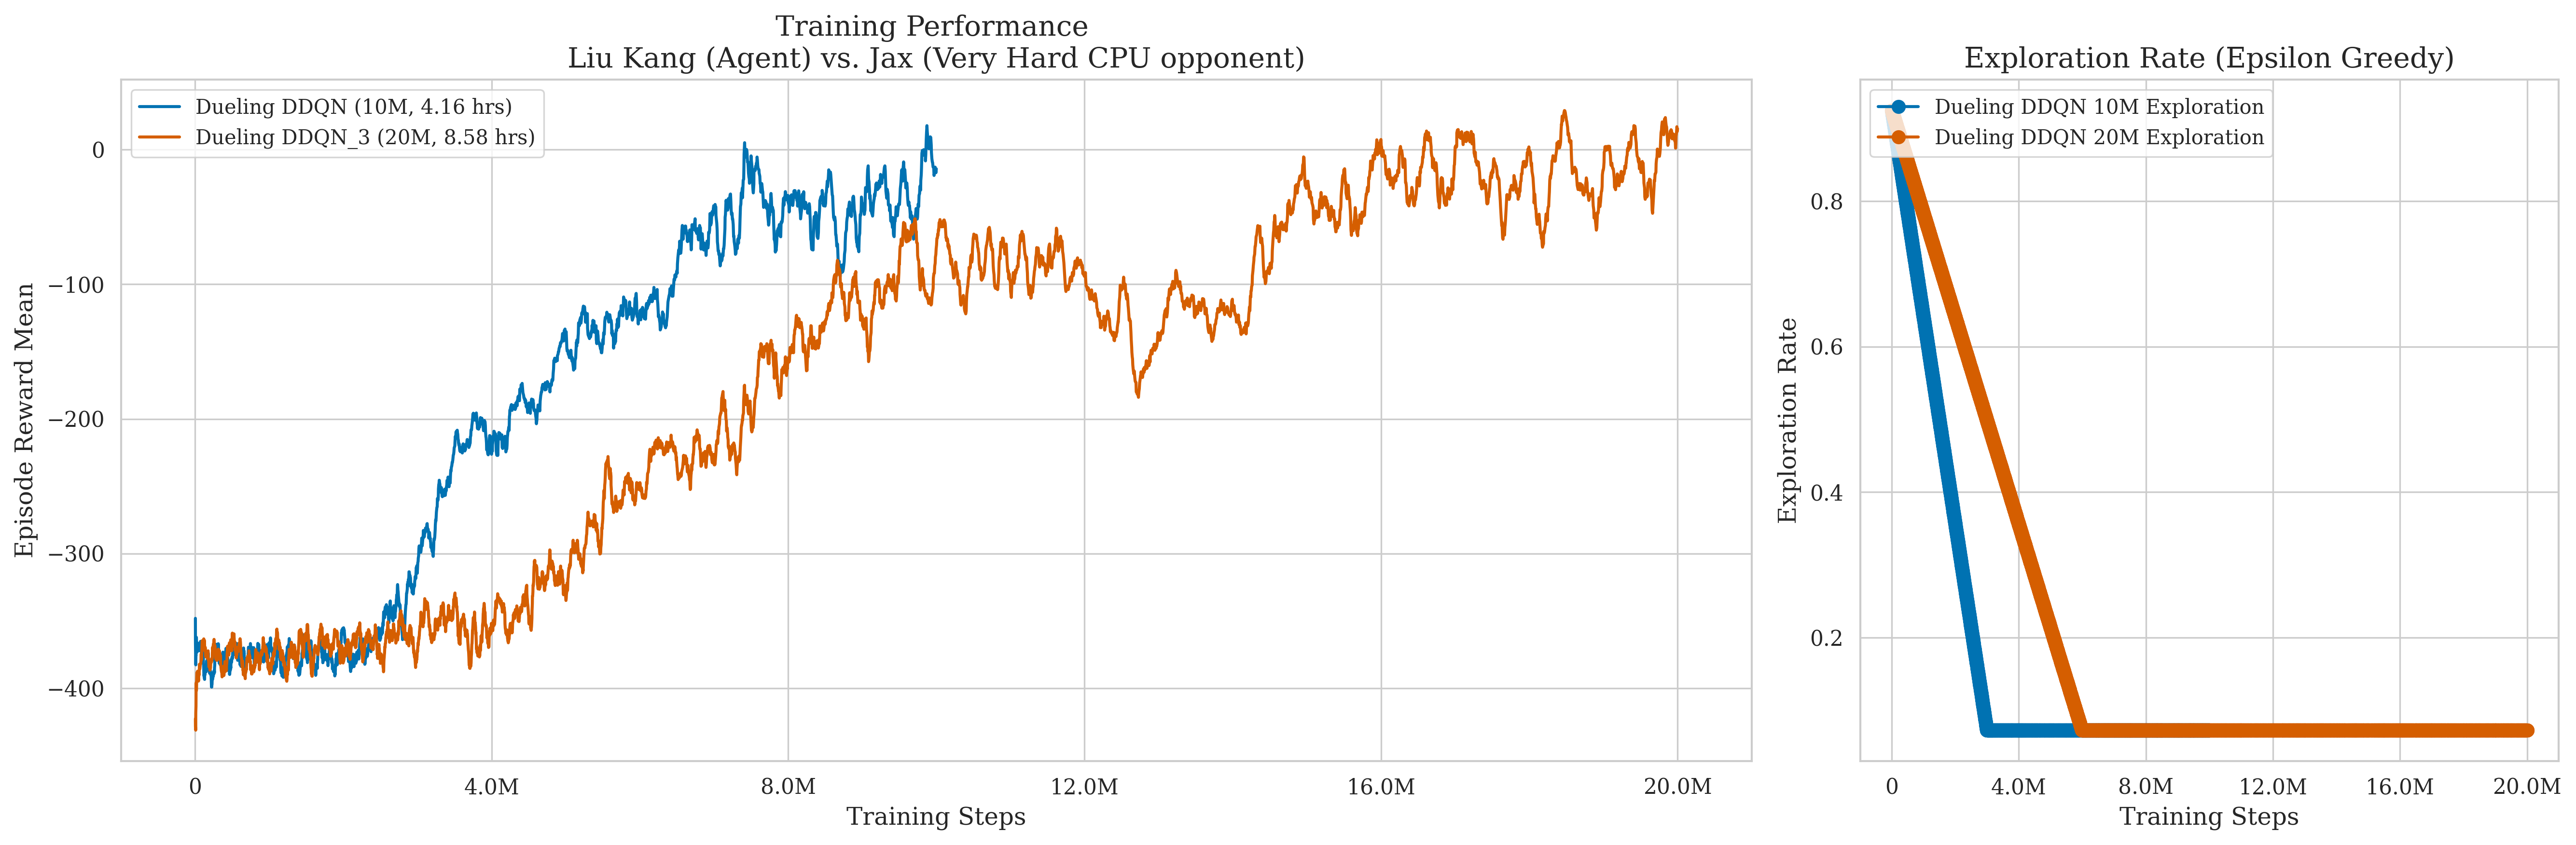

In [45]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorboard.backend.event_processing import event_accumulator
from matplotlib.ticker import FuncFormatter

# --- Helper Function to Load TensorBoard Data ---
def load_tensorboard_df(log_dir, tag):
    ea = event_accumulator.EventAccumulator(log_dir, size_guidance={'scalars': 0})
    ea.Reload()
    events = ea.Scalars(tag)
    df = pd.DataFrame(
        [(e.wall_time, e.step, e.value) for e in events],
        columns=['wall_time', 'step', 'value']
    )
    return df

# --- Custom Tick Formatter ---
def format_steps(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.1f}M'
    elif x >= 1e3:
        return f'{x/1e3:.0f}K'
    else:
        return f'{x:g}'

# ======================================================
# Define Directories for Very Hard Experiments 
# ======================================================
base_log_dir_veryhard = '/mnt/c/Users/SHiFT/OneDrive/Documents/dev/Kane vs Abel Mortal Kombat II/experiments/DuelingDoubleDQN/Veryhard'
dqn2_dir = os.path.join(base_log_dir_veryhard, 'DQN_2')  # 10M steps
dqn3_dir = os.path.join(base_log_dir_veryhard, 'DQN_3')  # 20M steps

# ======================================================
# Load Training Data for Rollout/Ep_Rew_Mean and Rollout/Exploration_Rate
# ======================================================
training_tag = 'rollout/ep_rew_mean'
exploration_tag = 'rollout/exploration_rate'

df_dqn2_train = load_tensorboard_df(dqn2_dir, tag=training_tag)
df_dqn3_train = load_tensorboard_df(dqn3_dir, tag=training_tag)
df_dqn2_explore = load_tensorboard_df(dqn2_dir, tag=exploration_tag)
df_dqn3_explore = load_tensorboard_df(dqn3_dir, tag=exploration_tag)

# Compute total wall time (in hours) for legend annotation
total_hours_dqn2 = (df_dqn2_train['wall_time'].iloc[-1] - df_dqn2_train['wall_time'].iloc[0]) / 3600
total_hours_dqn3 = (df_dqn3_train['wall_time'].iloc[-1] - df_dqn3_train['wall_time'].iloc[0]) / 3600

# ======================================================
# Set Plotting Style
# ======================================================
sns.set_context("paper", font_scale=1.2)
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'lines.linewidth': 1.5,
    'lines.markersize': 6,
    'legend.fontsize': 10,
    'figure.dpi': 300,
})

# ======================================================
# Create Combined Figure with Two Subplots (70% for reward, 30% for exploration rate)
# ======================================================
fig, (ax_train, ax_explore) = plt.subplots(1, 2, figsize=(18, 6), 
                                           gridspec_kw={'width_ratios': [7, 3]})

# ---------------------------
# Left: Training Performance (rollout/ep_rew_mean)
# ---------------------------
max_step_train = max(
    df_dqn2_train['step'].max(),
    df_dqn3_train['step'].max()
)
ticks_train = np.linspace(0, max_step_train, 6)
ax_train.set_xticks(ticks_train)
ax_train.xaxis.set_major_formatter(FuncFormatter(format_steps))

# Define colors for experiments
color_dqn2 = '#0072B2'  # Blue for DQN_2
color_dqn3 = '#D55E00'  # Red for DQN_3

ax_train.plot(df_dqn2_train['step'], df_dqn2_train['value'],
              label=f'Dueling DDQN (10M, {total_hours_dqn2:.2f} hrs)', color=color_dqn2)
ax_train.plot(df_dqn3_train['step'], df_dqn3_train['value'],
              label=f'Dueling DDQN_3 (20M, {total_hours_dqn3:.2f} hrs)', color=color_dqn3)
ax_train.set_xlabel('Training Steps')
ax_train.set_ylabel('Episode Reward Mean')
ax_train.set_title('Training Performance \nLiu Kang (Agent) vs. Jax (Very Hard CPU opponent)')
ax_train.legend(loc='upper left', frameon=True)
ax_train.grid(True)

# ---------------------------
# Right: Exploration Rate (rollout/exploration_rate)
# ---------------------------
max_step_explore = max(
    df_dqn2_explore['step'].max(),
    df_dqn3_explore['step'].max()
)
ticks_explore = np.linspace(0, max_step_explore, 6)
ax_explore.set_xticks(ticks_explore)
ax_explore.xaxis.set_major_formatter(FuncFormatter(format_steps))

ax_explore.plot(df_dqn2_explore['step'], df_dqn2_explore['value'],
                marker='o', linestyle='-', label='Dueling DDQN 10M Exploration', color=color_dqn2)
ax_explore.plot(df_dqn3_explore['step'], df_dqn3_explore['value'],
                marker='o', linestyle='-', label='Dueling DDQN 20M Exploration', color=color_dqn3)
ax_explore.set_xlabel('Training Steps')
ax_explore.set_ylabel('Exploration Rate')
ax_explore.set_title('Exploration Rate (Epsilon Greedy)')
ax_explore.legend(loc='upper left', frameon=True)
ax_explore.grid(True)

plt.tight_layout()
plt.savefig('veryhard_training_exploration.pdf', format='pdf', bbox_inches='tight')
plt.show()


In [37]:
print(os.listdir("/mnt/c/Users/SHiFT/OneDrive/Documents/dev/Kane vs Abel Mortal Kombat II/experiments/expirements/logs"))


['curriculum_learning', 'DQN_1', 'DQN_10', 'DQN_11', 'DQN_12', 'DQN_13', 'DQN_14', 'DQN_15', 'DQN_16', 'DQN_17', 'DQN_18', 'DQN_19', 'DQN_2', 'DQN_20', 'DQN_21', 'DQN_22', 'DQN_23', 'DQN_24', 'DQN_25', 'DQN_26', 'DQN_27', 'DQN_28', 'DQN_29', 'DQN_2M', 'DQN_2M_lrSchedule', 'DQN_2M_lrSchedule_FrameSkipping', 'DQN_3', 'DQN_30', 'DQN_31', 'DQN_32', 'DQN_33', 'DQN_34', 'DQN_35', 'DQN_4', 'DQN_4M_lrSchedule', 'DQN_5', 'DQN_6', 'DQN_7', 'DQN_8', 'multiple_states']
